In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from dotenv import load_dotenv
import mysql.connector
import seaborn as sns

In [52]:
# Load environment variables from .env file
load_dotenv('../.env')
'...' + os.getenv('MYSQL_HOST')[25:]

'...evrb.us-east-1.rds.amazonaws.com'

In [53]:
# Get MySQL credentials from environment variables
host = os.getenv('MYSQL_HOST')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

# Establish the connection
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

## load data

In [38]:
%%time

# query the database
query = """SELECT rr.distance, rr.duration, rr.static_duration, rr.observed, rr.route_id
FROM route_request rr
WHERE observed IS NOT NULL
"""

df_google_routes = pd.read_sql(query, connection)
df_google_routes

<timed exec>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


CPU times: user 65.4 ms, sys: 6.24 ms, total: 71.7 ms
Wall time: 713 ms


,distance,duration,static_duration,observed,route_id
0,963,153,159,2024-04-25 13:33:12,Zch_Heubeeribüel
1,1590,274,286,2024-04-25 13:33:12,Zch_Rosengartenbrücke
2,1194,173,155,2024-04-25 13:33:12,Zch_Stampfenbachstrasse
3,1433,369,241,2024-04-25 13:33:12,Zch_Rosengartenstrasse
4,2204,591,582,2024-04-25 13:33:12,Zch_Schimmelstrasse
...,...,...,...,...,...
4210,2204,645,543,2024-05-16 16:00:16,Zch_Schimmelstrasse
4211,1433,383,240,2024-05-16 16:00:18,Zch_Rosengartenstrasse
4212,1194,171,152,2024-05-16 16:00:16,Zch_Stampfenbachstrasse
4213,1590,274,284,2024-05-16 16:00:17,Zch_Rosengartenbrücke


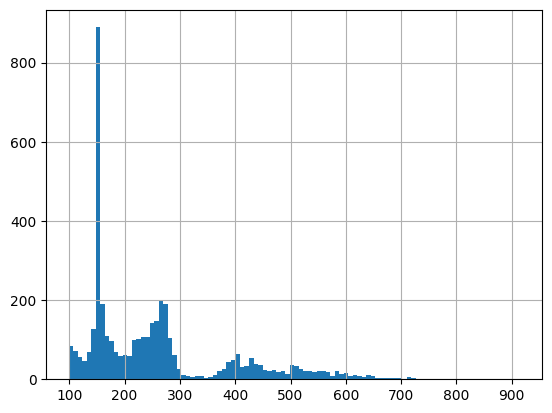

In [11]:
df_google_routes.duration.hist(bins=100);

In [34]:
%%time

# query the database
query = """SELECT station_id, observed, data_published, vehicle_count, vehicle_count_status
FROM `traffic-air-quality`.zrh_traffic_flow
WHERE vehicle_count_status != 'Fehlend';
"""

df_traffic_counters_zrh = pd.read_sql(query, connection)
df_traffic_counters_zrh

<timed exec>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


CPU times: user 301 ms, sys: 12.6 ms, total: 314 ms
Wall time: 1.27 s


,station_id,observed,data_published,vehicle_count,vehicle_count_status
0,Z002M001,2024-05-03 00:00:00,2024-05-15,38.0,Gemessen
1,Z002M001,2024-05-03 01:00:00,2024-05-15,17.0,Gemessen
2,Z002M001,2024-05-03 02:00:00,2024-05-15,11.0,Gemessen
3,Z002M001,2024-05-03 03:00:00,2024-05-15,12.0,Gemessen
4,Z002M001,2024-05-03 04:00:00,2024-05-15,11.0,Gemessen
...,...,...,...,...,...
82806,Z108M005,2024-05-01 19:00:00,2024-05-15,169.0,Gemessen
82807,Z108M005,2024-05-01 20:00:00,2024-05-15,137.0,Gemessen
82808,Z108M005,2024-05-01 21:00:00,2024-05-15,86.0,Gemessen
82809,Z108M005,2024-05-01 22:00:00,2024-05-15,65.0,Gemessen


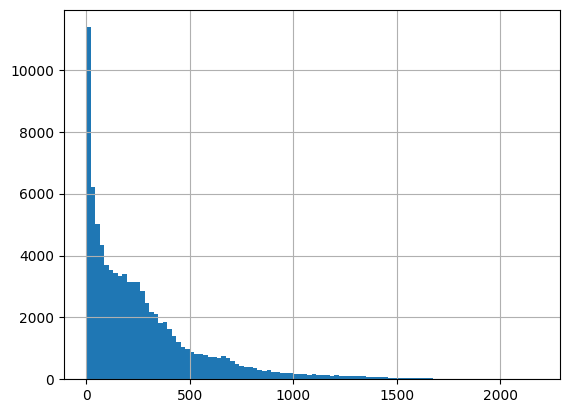

In [31]:
df_traffic_counters_zrh.vehicle_count.hist(bins=100);

In [54]:
query = """SELECT id, location_id, vehicle_flow_rate, measurement_time, num_input_values, speed
FROM `traffic-air-quality`.traffic_flow_data;
"""

df_traffic_flow_federal = pd.read_sql(query, connection)
df_traffic_flow_federal

/var/folders/3p/zn615dls2gv0xhj_cn94h4_h0000gn/T/ipykernel_23994/2584980619.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_traffic_flow_federal = pd.read_sql(query, connection)


,id,location_id,vehicle_flow_rate,measurement_time,num_input_values,speed
0,1,CH:0020,3120,2024-05-13 21:34:00,52,104.16000
1,2,CH:0066,1680,2024-05-13 21:34:00,28,100.89000
2,3,CH:0194,1800,2024-05-13 21:34:00,30,90.90830
3,4,CH:0240,3480,2024-05-13 21:34:00,58,80.46670
4,5,CH:0301,1080,2024-05-13 21:34:00,18,69.20000
...,...,...,...,...,...,...
985,1346,CH:0383,3180,2024-05-17 09:18:00,53,23.56830
986,1347,CH:0562,4320,2024-05-17 09:18:00,72,23.58890
987,1348,CH:0577,4080,2024-05-17 09:18:00,68,33.68440
988,1349,CH:0581,4380,2024-05-17 09:18:00,73,33.99110


# normalize

In [19]:
!pip install scikit-learn

  Using cached scikit_learn-1.4.2-cp39-cp39-macosx_12_0_arm64.whl (10.5 MB)
  Using cached scipy-1.13.0-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
You should consider upgrading via the '/Users/pascal/1_code/master_ids/dwdl_air-quality-traffic/venv/bin/python -m pip install --upgrade pip' command.


In [20]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

In [39]:
df_google_routes['time_per_distance'] = df_google_routes.duration / df_google_routes.distance
df_google_routes['value'] = min_max_scaler.fit_transform(df_google_routes[['time_per_distance']].values)
df_google_routes

,distance,duration,static_duration,observed,route_id,time_per_distance,value
0,963,153,159,2024-04-25 13:33:12,Zch_Heubeeribüel,0.158879,0.143575
1,1590,274,286,2024-04-25 13:33:12,Zch_Rosengartenbrücke,0.172327,0.168994
2,1194,173,155,2024-04-25 13:33:12,Zch_Stampfenbachstrasse,0.144891,0.117138
3,1433,369,241,2024-04-25 13:33:12,Zch_Rosengartenstrasse,0.257502,0.329977
4,2204,591,582,2024-04-25 13:33:12,Zch_Schimmelstrasse,0.268149,0.350101
...,...,...,...,...,...,...,...
4210,2204,645,543,2024-05-16 16:00:16,Zch_Schimmelstrasse,0.292650,0.396409
4211,1433,383,240,2024-05-16 16:00:18,Zch_Rosengartenstrasse,0.267271,0.348443
4212,1194,171,152,2024-05-16 16:00:16,Zch_Stampfenbachstrasse,0.143216,0.113973
4213,1590,274,284,2024-05-16 16:00:17,Zch_Rosengartenbrücke,0.172327,0.168994


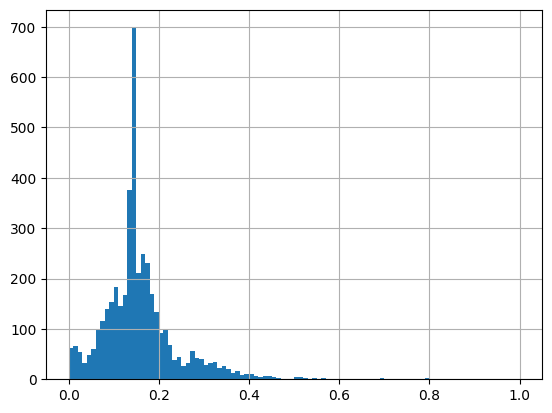

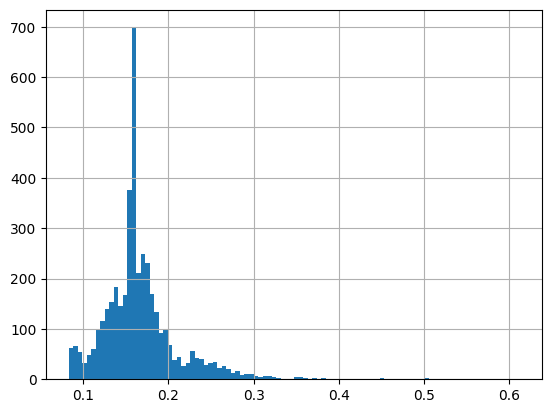

In [30]:
df_google_routes.value.hist(bins=100)
plt.show()
df_google_routes.time_per_distance.hist(bins=100);

In [36]:
# maybe per station? but now stations with more traffic have more, stations with less have less when compared, so should be good
df_traffic_counters_zrh['value'] = min_max_scaler.fit_transform(df_traffic_counters_zrh[['vehicle_count']].values)
df_traffic_counters_zrh

,station_id,observed,data_published,vehicle_count,vehicle_count_status,value
0,Z002M001,2024-05-03 00:00:00,2024-05-15,38.0,Gemessen,0.017439
1,Z002M001,2024-05-03 01:00:00,2024-05-15,17.0,Gemessen,0.007802
2,Z002M001,2024-05-03 02:00:00,2024-05-15,11.0,Gemessen,0.005048
3,Z002M001,2024-05-03 03:00:00,2024-05-15,12.0,Gemessen,0.005507
4,Z002M001,2024-05-03 04:00:00,2024-05-15,11.0,Gemessen,0.005048
...,...,...,...,...,...,...
82806,Z108M005,2024-05-01 19:00:00,2024-05-15,169.0,Gemessen,0.077559
82807,Z108M005,2024-05-01 20:00:00,2024-05-15,137.0,Gemessen,0.062873
82808,Z108M005,2024-05-01 21:00:00,2024-05-15,86.0,Gemessen,0.039468
82809,Z108M005,2024-05-01 22:00:00,2024-05-15,65.0,Gemessen,0.029830


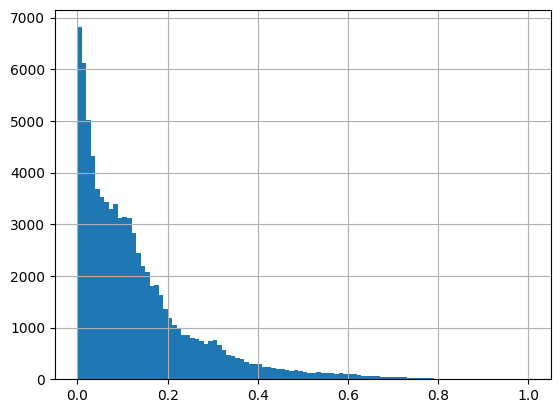

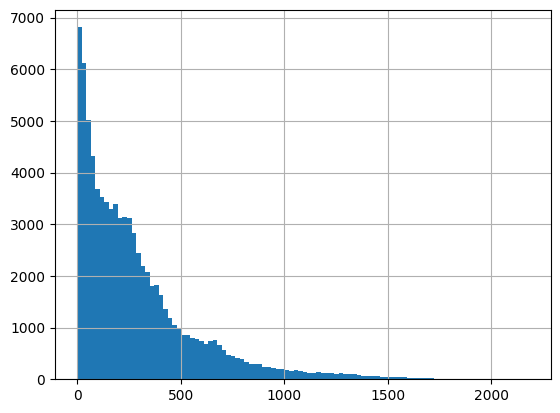

In [37]:
df_traffic_counters_zrh.value.hist(bins=100)
plt.show()
df_traffic_counters_zrh.vehicle_count.hist(bins=100);

In [56]:
df_traffic_flow_federal['value'] = min_max_scaler.fit_transform(df_traffic_flow_federal[['vehicle_flow_rate']].values)
df_traffic_flow_federal

,id,location_id,vehicle_flow_rate,measurement_time,num_input_values,speed,value
0,1,CH:0020,3120,2024-05-13 21:34:00,52,104.16000,0.340000
1,2,CH:0066,1680,2024-05-13 21:34:00,28,100.89000,0.180000
2,3,CH:0194,1800,2024-05-13 21:34:00,30,90.90830,0.193333
3,4,CH:0240,3480,2024-05-13 21:34:00,58,80.46670,0.380000
4,5,CH:0301,1080,2024-05-13 21:34:00,18,69.20000,0.113333
...,...,...,...,...,...,...,...
985,1346,CH:0383,3180,2024-05-17 09:18:00,53,23.56830,0.346667
986,1347,CH:0562,4320,2024-05-17 09:18:00,72,23.58890,0.473333
987,1348,CH:0577,4080,2024-05-17 09:18:00,68,33.68440,0.446667
988,1349,CH:0581,4380,2024-05-17 09:18:00,73,33.99110,0.480000


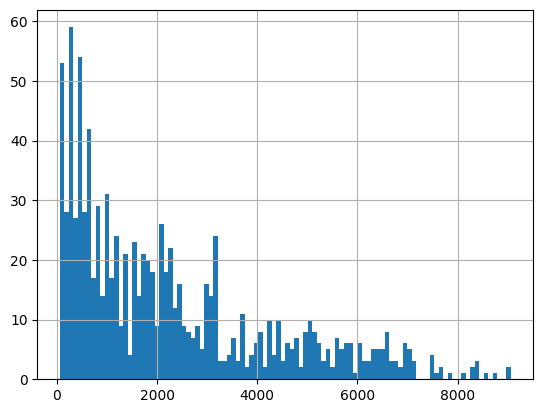

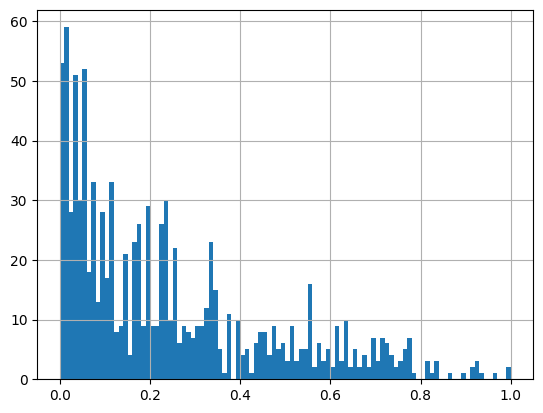

In [59]:
df_traffic_flow_federal.vehicle_flow_rate.hist(bins=100)
plt.show()
df_traffic_flow_federal.value.hist(bins=100);

## merge the sets

In [86]:
df_1 = df_google_routes.copy()[['route_id', 'value', 'observed', 'time_per_distance']]
df_1.rename(columns={'route_id': 'station_id', 'time_per_distance': 'original_value'}, inplace=True)
df_1.loc[:,'origin'] = 'google-routes'
df_1.loc[:,'original_value_unit'] = 'travel time [s/m]'
df_1

,station_id,value,observed,original_value,origin,original_value_unit
0,Zch_Heubeeribüel,0.143575,2024-04-25 13:33:12,0.158879,google-routes,travel time [s/m]
1,Zch_Rosengartenbrücke,0.168994,2024-04-25 13:33:12,0.172327,google-routes,travel time [s/m]
2,Zch_Stampfenbachstrasse,0.117138,2024-04-25 13:33:12,0.144891,google-routes,travel time [s/m]
3,Zch_Rosengartenstrasse,0.329977,2024-04-25 13:33:12,0.257502,google-routes,travel time [s/m]
4,Zch_Schimmelstrasse,0.350101,2024-04-25 13:33:12,0.268149,google-routes,travel time [s/m]
...,...,...,...,...,...,...
4210,Zch_Schimmelstrasse,0.396409,2024-05-16 16:00:16,0.292650,google-routes,travel time [s/m]
4211,Zch_Rosengartenstrasse,0.348443,2024-05-16 16:00:18,0.267271,google-routes,travel time [s/m]
4212,Zch_Stampfenbachstrasse,0.113973,2024-05-16 16:00:16,0.143216,google-routes,travel time [s/m]
4213,Zch_Rosengartenbrücke,0.168994,2024-05-16 16:00:17,0.172327,google-routes,travel time [s/m]


In [87]:
df_traffic_counters_zrh

,station_id,observed,data_published,vehicle_count,vehicle_count_status,value,origin
0,Z002M001,2024-05-03 00:00:00,2024-05-15,38.0,Gemessen,0.017439,zurich-traffic-counters
1,Z002M001,2024-05-03 01:00:00,2024-05-15,17.0,Gemessen,0.007802,zurich-traffic-counters
2,Z002M001,2024-05-03 02:00:00,2024-05-15,11.0,Gemessen,0.005048,zurich-traffic-counters
3,Z002M001,2024-05-03 03:00:00,2024-05-15,12.0,Gemessen,0.005507,zurich-traffic-counters
4,Z002M001,2024-05-03 04:00:00,2024-05-15,11.0,Gemessen,0.005048,zurich-traffic-counters
...,...,...,...,...,...,...,...
82806,Z108M005,2024-05-01 19:00:00,2024-05-15,169.0,Gemessen,0.077559,zurich-traffic-counters
82807,Z108M005,2024-05-01 20:00:00,2024-05-15,137.0,Gemessen,0.062873,zurich-traffic-counters
82808,Z108M005,2024-05-01 21:00:00,2024-05-15,86.0,Gemessen,0.039468,zurich-traffic-counters
82809,Z108M005,2024-05-01 22:00:00,2024-05-15,65.0,Gemessen,0.029830,zurich-traffic-counters


In [91]:
df_2 = df_traffic_counters_zrh.copy()[['station_id', 'value', 'observed', 'vehicle_count']]
df_2.rename(columns={'vehicle_count': 'original_value'}, inplace=True)
df_2['origin'] = 'zurich-traffic-counters'
df_2['original_value_unit'] = 'vehicles per hour'
df_2

,station_id,value,observed,original_value,origin,original_value_unit
0,Z002M001,0.017439,2024-05-03 00:00:00,38.0,zurich-traffic-counters,vehicles per hour
1,Z002M001,0.007802,2024-05-03 01:00:00,17.0,zurich-traffic-counters,vehicles per hour
2,Z002M001,0.005048,2024-05-03 02:00:00,11.0,zurich-traffic-counters,vehicles per hour
3,Z002M001,0.005507,2024-05-03 03:00:00,12.0,zurich-traffic-counters,vehicles per hour
4,Z002M001,0.005048,2024-05-03 04:00:00,11.0,zurich-traffic-counters,vehicles per hour
...,...,...,...,...,...,...
82806,Z108M005,0.077559,2024-05-01 19:00:00,169.0,zurich-traffic-counters,vehicles per hour
82807,Z108M005,0.062873,2024-05-01 20:00:00,137.0,zurich-traffic-counters,vehicles per hour
82808,Z108M005,0.039468,2024-05-01 21:00:00,86.0,zurich-traffic-counters,vehicles per hour
82809,Z108M005,0.029830,2024-05-01 22:00:00,65.0,zurich-traffic-counters,vehicles per hour


In [92]:
df_traffic_flow_federal

,id,location_id,vehicle_flow_rate,measurement_time,num_input_values,speed,value
0,1,CH:0020,3120,2024-05-13 21:34:00,52,104.16000,0.340000
1,2,CH:0066,1680,2024-05-13 21:34:00,28,100.89000,0.180000
2,3,CH:0194,1800,2024-05-13 21:34:00,30,90.90830,0.193333
3,4,CH:0240,3480,2024-05-13 21:34:00,58,80.46670,0.380000
4,5,CH:0301,1080,2024-05-13 21:34:00,18,69.20000,0.113333
...,...,...,...,...,...,...,...
985,1346,CH:0383,3180,2024-05-17 09:18:00,53,23.56830,0.346667
986,1347,CH:0562,4320,2024-05-17 09:18:00,72,23.58890,0.473333
987,1348,CH:0577,4080,2024-05-17 09:18:00,68,33.68440,0.446667
988,1349,CH:0581,4380,2024-05-17 09:18:00,73,33.99110,0.480000


In [93]:
df_3 = df_traffic_flow_federal.copy()[['location_id', 'measurement_time', 'value', 'vehicle_flow_rate']]
df_3.rename(columns={'location_id': 'station_id', 'measurement_time': 'observed', 'vehicle_flow_rate': 'original_value'}, inplace=True)
df_3.loc[:,'origin'] = 'federal-traffic-counters'
df_3['original_value_unit'] = 'vehicles per hour'
df_3

,station_id,observed,value,original_value,origin,original_value_unit
0,CH:0020,2024-05-13 21:34:00,0.340000,3120,federal-traffic-counters,vehicles per hour
1,CH:0066,2024-05-13 21:34:00,0.180000,1680,federal-traffic-counters,vehicles per hour
2,CH:0194,2024-05-13 21:34:00,0.193333,1800,federal-traffic-counters,vehicles per hour
3,CH:0240,2024-05-13 21:34:00,0.380000,3480,federal-traffic-counters,vehicles per hour
4,CH:0301,2024-05-13 21:34:00,0.113333,1080,federal-traffic-counters,vehicles per hour
...,...,...,...,...,...,...
985,CH:0383,2024-05-17 09:18:00,0.346667,3180,federal-traffic-counters,vehicles per hour
986,CH:0562,2024-05-17 09:18:00,0.473333,4320,federal-traffic-counters,vehicles per hour
987,CH:0577,2024-05-17 09:18:00,0.446667,4080,federal-traffic-counters,vehicles per hour
988,CH:0581,2024-05-17 09:18:00,0.480000,4380,federal-traffic-counters,vehicles per hour


In [94]:
df_traffic = pd.concat([df_1, df_2, df_3], ignore_index=True)
# round down to hour
df_traffic['observed'] = df_traffic['observed'].dt.floor('h')
df_traffic

,station_id,value,observed,original_value,origin,original_value_unit
0,Zch_Heubeeribüel,0.143575,2024-04-25 13:00:00,0.158879,google-routes,travel time [s/m]
1,Zch_Rosengartenbrücke,0.168994,2024-04-25 13:00:00,0.172327,google-routes,travel time [s/m]
2,Zch_Stampfenbachstrasse,0.117138,2024-04-25 13:00:00,0.144891,google-routes,travel time [s/m]
3,Zch_Rosengartenstrasse,0.329977,2024-04-25 13:00:00,0.257502,google-routes,travel time [s/m]
4,Zch_Schimmelstrasse,0.350101,2024-04-25 13:00:00,0.268149,google-routes,travel time [s/m]
...,...,...,...,...,...,...
88011,CH:0383,0.346667,2024-05-17 09:00:00,3180.000000,federal-traffic-counters,vehicles per hour
88012,CH:0562,0.473333,2024-05-17 09:00:00,4320.000000,federal-traffic-counters,vehicles per hour
88013,CH:0577,0.446667,2024-05-17 09:00:00,4080.000000,federal-traffic-counters,vehicles per hour
88014,CH:0581,0.480000,2024-05-17 09:00:00,4380.000000,federal-traffic-counters,vehicles per hour


In [83]:
# show duplicates
df_traffic[df_traffic.duplicated(subset=['station_id', 'observed'], keep=False)].sort_values(['observed', 'station_id'])

,station_id,value,observed,origin
0,Zch_Heubeeribüel,0.143575,2024-04-25 13:00:00,google-routes
8,Zch_Heubeeribüel,0.143575,2024-04-25 13:00:00,google-routes
1,Zch_Rosengartenbrücke,0.168994,2024-04-25 13:00:00,google-routes
9,Zch_Rosengartenbrücke,0.171371,2024-04-25 13:00:00,google-routes
3,Zch_Rosengartenstrasse,0.329977,2024-04-25 13:00:00,google-routes
...,...,...,...,...
88014,CH:0581,0.480000,2024-05-17 09:00:00,federal-traffic-counters
87985,CH:0813,0.113333,2024-05-17 09:00:00,federal-traffic-counters
87995,CH:0813,0.253333,2024-05-17 09:00:00,federal-traffic-counters
88005,CH:0813,0.220000,2024-05-17 09:00:00,federal-traffic-counters
